# Part I: Data Preparation

## Read data from csv

In [206]:
import pandas as pd

DATA_DIR = 'C:\\Users\\Elham\\datasets\\noshowappointments'
CSV_FILE = DATA_DIR + '\\'+ 'KaggleV2-May-2016.csv'

appt_df=pd.read_csv(CSV_FILE)



In [207]:
appt_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [208]:
len(appt_df)

110527

## Data cleanup

- Cleanup column names
- Remove records with erroneous entries (e.g., negative ages). Look at what people have done in Kaggle

In [209]:
# do data cleanup here
# highly recommend that you rename dataset
# e.g., if you used appt_df = pd.read_csv(...) above
# first thing to do here is clean_appt_df = appt_df
clean_appt_df=appt_df
clean_appt_df.rename(columns = {'AppointmentID':'AppointmentId','Hipertension': 'Hypertension','Handcap': 'Handicap','No-show': 'No_Show'}, inplace = True)

In [210]:

print('Gender:',clean_appt_df.Gender.unique())
Sorted_Schedule=sorted(clean_appt_df.ScheduledDay.unique())
print('ScheduledDay:',Sorted_Schedule[0],Sorted_Schedule[-1])
Sorted_App_Day=sorted(clean_appt_df.AppointmentDay.unique())
print('AppointmentDay:',Sorted_App_Day[0],Sorted_App_Day[-1])
print('Age:',sorted(clean_appt_df.Age.unique()))
print('Neighbourhood:',clean_appt_df.Neighbourhood.unique())
print('Scholarship:',clean_appt_df.Scholarship.unique())
print('Hypertension:',clean_appt_df.Hypertension.unique())
print('Diabetes:',clean_appt_df.Diabetes.unique())
print('Alcoholism:',clean_appt_df.Alcoholism.unique())
print('Handicap:',clean_appt_df.Handicap.unique())
print('SMS_received:',clean_appt_df.SMS_received.unique())
print('No_Show:',clean_appt_df.No_Show.unique())


Gender: ['F' 'M']
ScheduledDay: 2015-11-10T07:13:56Z 2016-06-08T20:07:23Z
AppointmentDay: 2016-04-29T00:00:00Z 2016-06-08T00:00:00Z
Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRI

In [212]:
clean_appt_df=clean_appt_df[(clean_appt_df.Age >= 0) & (clean_appt_df.Age <= 100)]

clean_appt_df['ScheduledDay']=pd.to_datetime(clean_appt_df['ScheduledDay'])
clean_appt_df['AppointmentDay']=pd.to_datetime(clean_appt_df['AppointmentDay'])


In [213]:
clean_appt_df

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


In [214]:
clean_appt_df['sex'] = [0 if i == 'F' else 1 for i in clean_appt_df['Gender']]
clean_appt_df['Show_Status'] = [0 if i == 'No' else 1 for i in clean_appt_df['No_Show']]
clean_appt_df['Waiting_Time']= (clean_appt_df['AppointmentDay']-pd.to_datetime(clean_appt_df['ScheduledDay'].dt.date)).dt.days
clean_appt_df['area'] = pd.factorize(clean_appt_df['Neighbourhood'])[0]
clean_appt_df['weekday'] = clean_appt_df['AppointmentDay'].dt.weekday

clean_appt_df

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,sex,Show_Status,Waiting_Time,area,weekday
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0,0,0,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0,0,0,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0,0,1,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0,0,2,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0,0,0,4
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,0,0,2,3,4
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,0,1,2,4,4
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,0,1,2,4,4
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0,0,0,5,4
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,0,0,2,6,4


In [215]:
clean_appt_df['Waiting_Time']

0          0
1          0
2          0
3          0
4          0
5          2
6          2
7          2
8          0
9          2
10         2
11         3
12         1
13         1
14         1
15         3
16         1
17         1
18         3
19         0
20         2
21         2
22         4
23         1
24         0
25         3
26         0
27         2
28         0
29         0
          ..
110497     0
110498     0
110499     0
110500     0
110501     0
110502     0
110503     0
110504     0
110505     0
110506     0
110507     0
110508     0
110509     0
110510     0
110511     0
110512     0
110513     0
110514     0
110515     2
110516     1
110517     0
110518    41
110519    41
110520    35
110521    35
110522    35
110523    35
110524    41
110525    41
110526    41
Name: Waiting_Time, Length: 110519, dtype: int64

In [216]:
sorted(clean_appt_df['Waiting_Time'].unique())

[-6,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 101,
 102,
 103,
 104,
 105,
 107,
 108,
 109,
 110,
 111,
 112,
 115,
 117,
 119,
 122,
 123,
 125,
 126,
 127,
 132,
 133,
 139,
 142,
 146,
 151,
 155,
 162,
 169,
 176,
 179]

In [195]:
clean_appt_df=clean_appt_df[clean_appt_df.Waiting_Time>=0]
clean_appt_df['Waiting_Time']

0          0
1          0
2          0
3          0
4          0
5          2
6          2
7          2
8          0
9          2
10         2
11         3
12         1
13         1
14         1
15         3
16         1
17         1
18         3
19         0
20         2
21         2
22         4
23         1
24         0
25         3
26         0
27         2
28         0
29         0
          ..
110497     0
110498     0
110499     0
110500     0
110501     0
110502     0
110503     0
110504     0
110505     0
110506     0
110507     0
110508     0
110509     0
110510     0
110511     0
110512     0
110513     0
110514     0
110515     2
110516     1
110517     0
110518    41
110519    41
110520    35
110521    35
110522    35
110523    35
110524    41
110525    41
110526    41
Name: Waiting_Time, Length: 110514, dtype: int64

In [217]:
clean_appt_df['Waiting_Time_Cat'] = clean_appt_df['Waiting_Time'].astype(int).map(lambda x: 4 if x > 30 else 3 if x>7 else 2 if x>=1 else 1 )
#clean_appt_df['Waiting_Time_Cat'] = [2 if i > 1 and i <= 7 else i for i in clean_appt_df['Waiting_Time']]
#clean_appt_df['Waiting_Time_Cat'] = [3 if i > 7 and i <= 30 else i for i in clean_appt_df['Waiting_Time']]
#clean_appt_df['Waiting_Time_Cat'] = [4 if i > 30 else i for i in clean_appt_df['Waiting_Time']]
clean_appt_df['Age_Cat'] = pd.qcut(clean_appt_df['Age'], 6, labels=False)


clean_appt_df

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,Handicap,SMS_received,No_Show,sex,Show_Status,Waiting_Time,area,weekday,Waiting_Time_Cat,Age_Cat
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,0,0,No,0,0,0,0,4,1,5
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,0,0,No,1,0,0,0,4,1,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,...,0,0,No,0,0,0,1,4,1,5
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,0,0,No,0,0,0,2,4,1,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,0,0,No,0,0,0,0,4,1,4
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,...,0,0,No,0,0,2,3,4,2,5
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,...,0,0,Yes,0,1,2,4,4,2,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,...,0,0,Yes,0,1,2,4,4,2,3
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,...,0,0,No,0,0,0,5,4,1,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,...,0,0,No,0,0,2,6,4,2,1


In [219]:
clean_appt_df['Waiting_Time_Cat'].unique()

array([1, 2, 3, 4], dtype=int64)

In [220]:
pd.qcut(clean_appt_df['Age'], 6)

0          (61.0, 100.0]
1           (50.0, 61.0]
2          (61.0, 100.0]
3         (-0.001, 10.0]
4           (50.0, 61.0]
5          (61.0, 100.0]
6           (10.0, 24.0]
7           (37.0, 50.0]
8           (10.0, 24.0]
9           (10.0, 24.0]
10          (24.0, 37.0]
11          (24.0, 37.0]
12          (10.0, 24.0]
13          (24.0, 37.0]
14          (50.0, 61.0]
15          (10.0, 24.0]
16          (37.0, 50.0]
17          (37.0, 50.0]
18          (24.0, 37.0]
19          (37.0, 50.0]
20          (24.0, 37.0]
21        (-0.001, 10.0]
22          (10.0, 24.0]
23          (37.0, 50.0]
24         (61.0, 100.0]
25          (37.0, 50.0]
26          (37.0, 50.0]
27        (-0.001, 10.0]
28          (50.0, 61.0]
29          (24.0, 37.0]
               ...      
110497     (61.0, 100.0]
110498      (50.0, 61.0]
110499     (61.0, 100.0]
110500      (50.0, 61.0]
110501      (37.0, 50.0]
110502      (10.0, 24.0]
110503     (61.0, 100.0]
110504    (-0.001, 10.0]
110505      (50.0, 61.0]


## Test set creation

- Create a test set of 100k records
- Use stratified sampling on the `No-Show` variable to make sure class proportions are the same for train and test sets
- Save train and test sets as csv files in the `processed_data` directory

In [221]:
import os
PROCESSED_DATA_DIR = 'Processed_Data'
Train_FILE = PROCESSED_DATA_DIR + '/'+ 'Train_Set.csv'
Test_FILE = PROCESSED_DATA_DIR + '/'+ 'Test_Set.csv'

# create test set with stratified sampling here
# refer to the intro notebook posted in class calendar for example

if not os.path.isdir(PROCESSED_DATA_DIR):
      os.makedirs(PROCESSED_DATA_DIR)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=20000./len(clean_appt_df), random_state=1234)
for train_index, test_index in split.split(clean_appt_df, clean_appt_df["Show_Status"]):
    train_set = clean_appt_df.loc[train_index]
    test_set = clean_appt_df.loc[test_index]
    
train_set.to_csv(Train_FILE) 
test_set.to_csv(Test_FILE) 
    

In [129]:
Train_FILE



'Processed_Data/Train_Set.csv'

## Exploratory Data Analysis

Plot the `No-show` variable against other variables. Remember from this point forward you are only using the training set created in the previous step

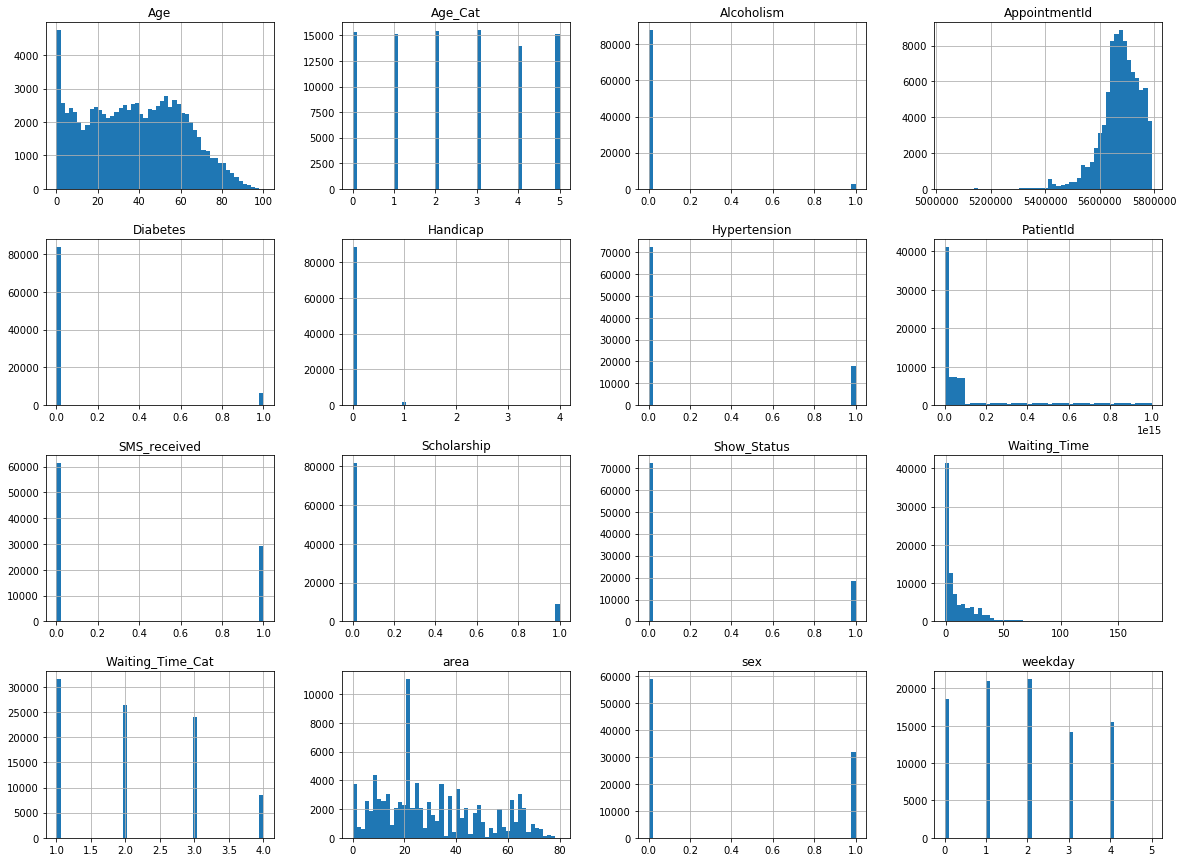

In [222]:
# Make plots here!

%matplotlib inline
import matplotlib.pyplot as plt
train_set.hist(bins=50, figsize=(20,15))
plt.show()

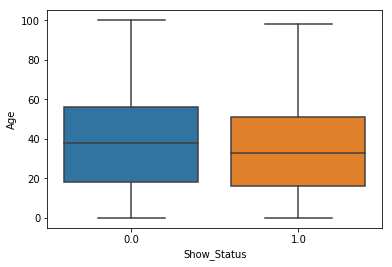

In [223]:
import seaborn as sb
age_hist = sb.boxplot(x="Show_Status", y="Age", data=train_set)

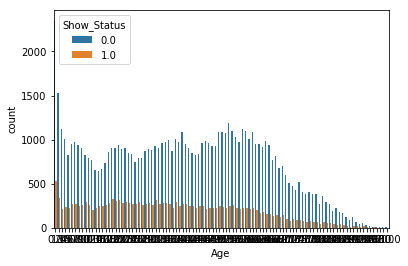

In [225]:
sb.countplot(x="Age", hue = "Show_Status", data=train_set)

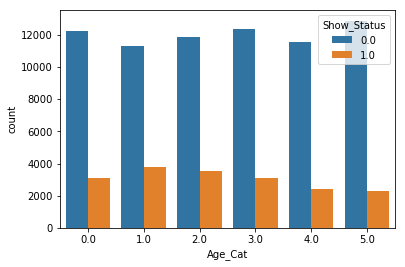

In [226]:
sb.countplot(x="Age_Cat", hue = "Show_Status", data=train_set)

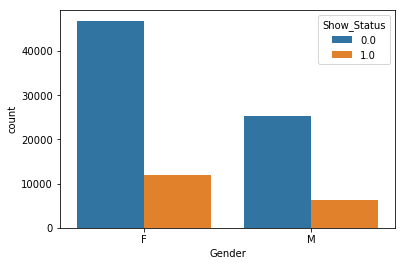

In [227]:
sb.countplot(x="Gender", hue = "Show_Status", data=train_set)

In [228]:
train_set.columns

Index(['PatientId', 'AppointmentId', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show', 'sex',
       'Show_Status', 'Waiting_Time', 'area', 'weekday', 'Waiting_Time_Cat',
       'Age_Cat'],
      dtype='object')

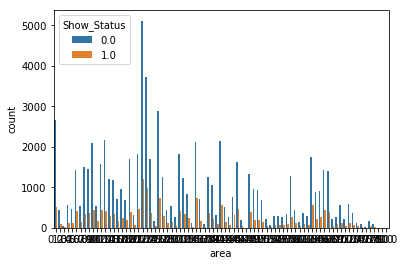

In [232]:
sb.countplot(x="area", hue = "Show_Status", data=train_set)


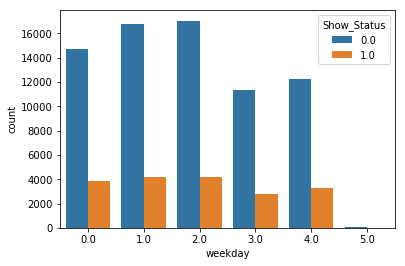

In [233]:
sb.countplot(x="weekday", hue = "Show_Status", data=train_set)

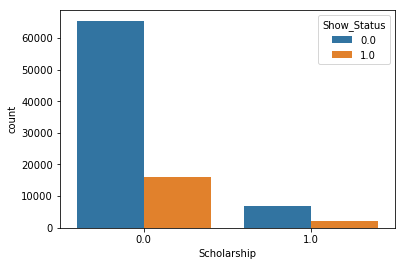

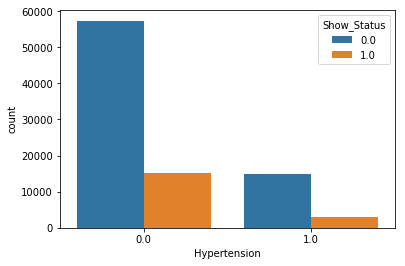

In [237]:
sb.countplot(x="Hypertension", hue = "Show_Status", data=train_set)



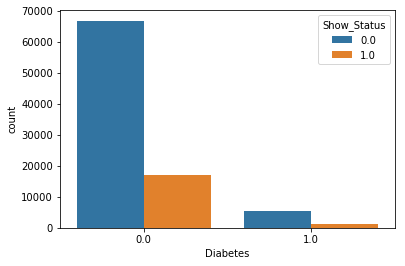

In [238]:
sb.countplot(x="Diabetes", hue = "Show_Status", data=train_set)




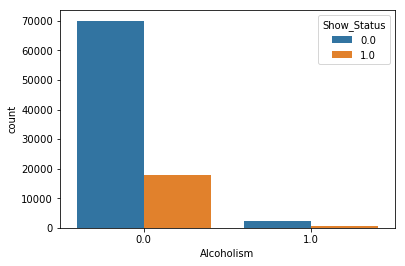

In [239]:
sb.countplot(x="Alcoholism", hue = "Show_Status", data=train_set)


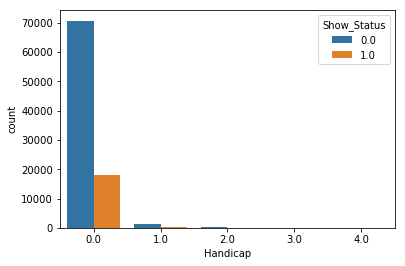

In [242]:
sb.countplot(x="Handicap", hue = "Show_Status", data=train_set)


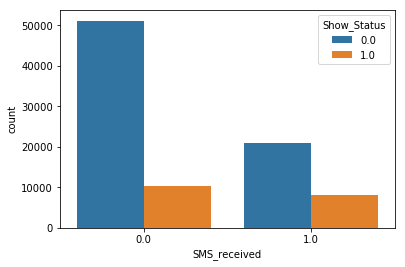

In [243]:
sb.countplot(x="SMS_received", hue = "Show_Status", data=train_set)

In [244]:
train_set.columns

Index(['PatientId', 'AppointmentId', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show', 'sex',
       'Show_Status', 'Waiting_Time', 'area', 'weekday', 'Waiting_Time_Cat',
       'Age_Cat'],
      dtype='object')

In [246]:
X = train_set[['Gender', 'Age', 'Scholarship', 'Hypertension','Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'sex',
        'Waiting_Time', 'area', 'weekday', 'Waiting_Time_Cat','Age_Cat','Show_Status']]
corr_matrix = X.corr()
corr_matrix["Show_Status"].sort_values(ascending=False)

Show_Status         1.000000
Waiting_Time_Cat    0.273903
Waiting_Time        0.185490
SMS_received        0.125643
Scholarship         0.029755
area                0.020284
weekday             0.000696
Alcoholism          0.000248
sex                -0.004580
Handicap           -0.006392
Diabetes           -0.014208
Hypertension       -0.037015
Age                -0.061001
Age_Cat            -0.062867
Name: Show_Status, dtype: float64

## Data preprocessing

Create a scikit pipeline for preprocessing the data to prepare it for ML algorithms. At a minimum your pipeline should:

- Standardize numerical variables
- Transform categorical variables into numeric variables

Optionally, you can perform any other transformation you think is suitable. Again, refer to the intro notebook for an example of setting up a preprocessing pipeline.

In [248]:
cat_attributes = ['Gender', 'Neighbourhood','No_Show' ]
not_used_attributes=['PatientId', 'AppointmentId', 'Gender', 'ScheduledDay','AppointmentDay']
num_attributes = [x for x in list(train_set) if ((x not in cat_attributes) & (x not in not_used_attributes)) ]
num_attributes

['Age',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_received',
 'sex',
 'Show_Status',
 'Waiting_Time',
 'area',
 'weekday',
 'Waiting_Time_Cat',
 'Age_Cat']

In [251]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, LabelBinarizer

# create pipeline here!

cat_attributes = ['Gender', 'Neighbourhood','No_Show' ]
not_used_attributes=['PatientId', 'AppointmentId', 'Gender', 'ScheduledDay','AppointmentDay']
num_attributes = [x for x in list(train_set) if ((x not in cat_attributes) & (x not in not_used_attributes)) ]

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names].values
    

    
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attributes)),('std_scaler', StandardScaler())])

cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attributes)),('label_binarizer', LabelBinarizer())])

full_pipeline = FeatureUnion(transformer_list=[('num_pipeline', num_pipeline),('cat_pipeline', cat_pipeline)])


# show the first 5 rows of the transformed training set

In [253]:
transform_train_set = full_pipeline.fit_transform(train_set[cat_attributes+num_attributes])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').